In [1]:
#Importing libraries: 
from PIL import Image
import random, os
import torch
import torch.nn as nn
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import sys
sys.path.append('/')

#requriements
#pip install efficientnet_pytorch
#conda install -c conda-forge opencv

import cv2
import numpy as np
from efficientnet_pytorch import EfficientNet
from grad_cam import GradCam,GuidedBackpropReLUModel,show_cams,show_gbs,preprocess_image

In [581]:
#Load the model
model = EfficientNet.from_name('efficientnet-b1')
for params in model.parameters():
    params.requires_grad = True

In [582]:
#Add extra steps for last layer and correct number of classes (=1):
in_ftrs = model._fc.in_features
model._fc = nn.Linear(in_ftrs, 1)


In [583]:
#To load the model:
loaded_model = model
loaded_model.load_state_dict(torch.load('1000images_200_clusters.pt'))

<All keys matched successfully>

In [584]:
#Extract Grad-cam heat maps:
grad_cam = GradCam(model=loaded_model, blob_name = '_blocks', target_layer_names=['10','13','14','15','20','21','22'], use_cuda=False)
img = cv2.imread('/assets/demo_raw', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)

In [585]:
target_index = None #281 for cat #dog 245 or 242 one is bulldog and more accurate
mask_dic = grad_cam(inputs, target_index)
show_cams(img, mask_dic)
gb_model = GuidedBackpropReLUModel(model=model, activation_layer_name = 'MemoryEfficientSwish', use_cuda=False)
show_gbs(inputs, gb_model, target_index, mask_dic)

In [597]:
#Generate segmentation masks based on the heat maps
#For model with 50 or 200 clusters (narrow threshold):
segmentation_dic = []
new_dic = mask_dic['14'].copy()
for _l in range(len(mask_dic['14'])):
    for _p in range(len(mask_dic['14'][_l])):
        if _dic['14'][_l][_p] > 0.4 and _dic['14'][_l][_p] < 0.7:
            new_dic[_l][_p] = 1
        else:
            new_dic[_l][_p] = 0
new_dic = {'14':new_dic}
segmentation_dic.append(new_dic)

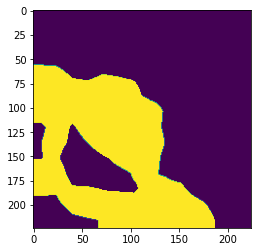

In [592]:
#To plot the grad-cam and segmentation masks:
pl.imshow(mask_dic['14'])
pl.imshow(segmentation_dic['14'])